In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heaart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.shape

(303, 14)

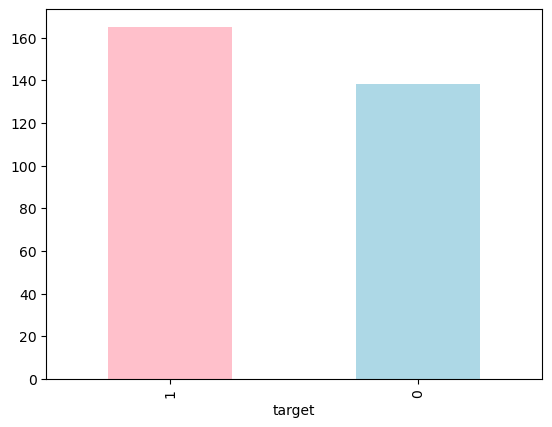

In [6]:
df.target.value_counts().plot(kind='bar', color=['pink','lightblue'])
plt.show()

The target variable has 165 people with heart disease and 138 without heart disease. So data is balanced

In [7]:
#Chcking null values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#Separating categorical and continuous columns
categorical = []
continuous = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical.append(column)
    else:
        continuous.append(column)

In [9]:
categorical

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [10]:
continuous

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

#### Exploratory Data Analysis

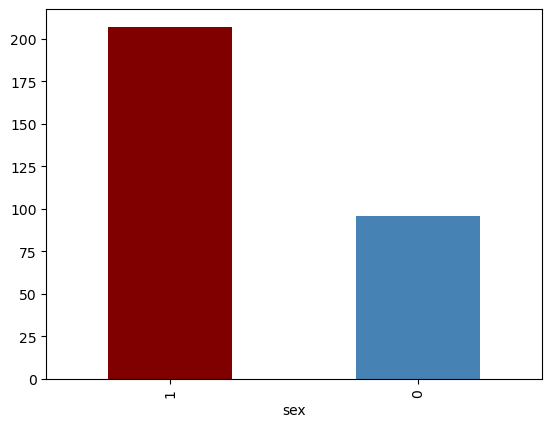

In [11]:
df.sex.value_counts().plot(kind='bar', color=['maroon','steelblue'])
plt.show()

Above plot shows that male patients are almost double in number than female patient

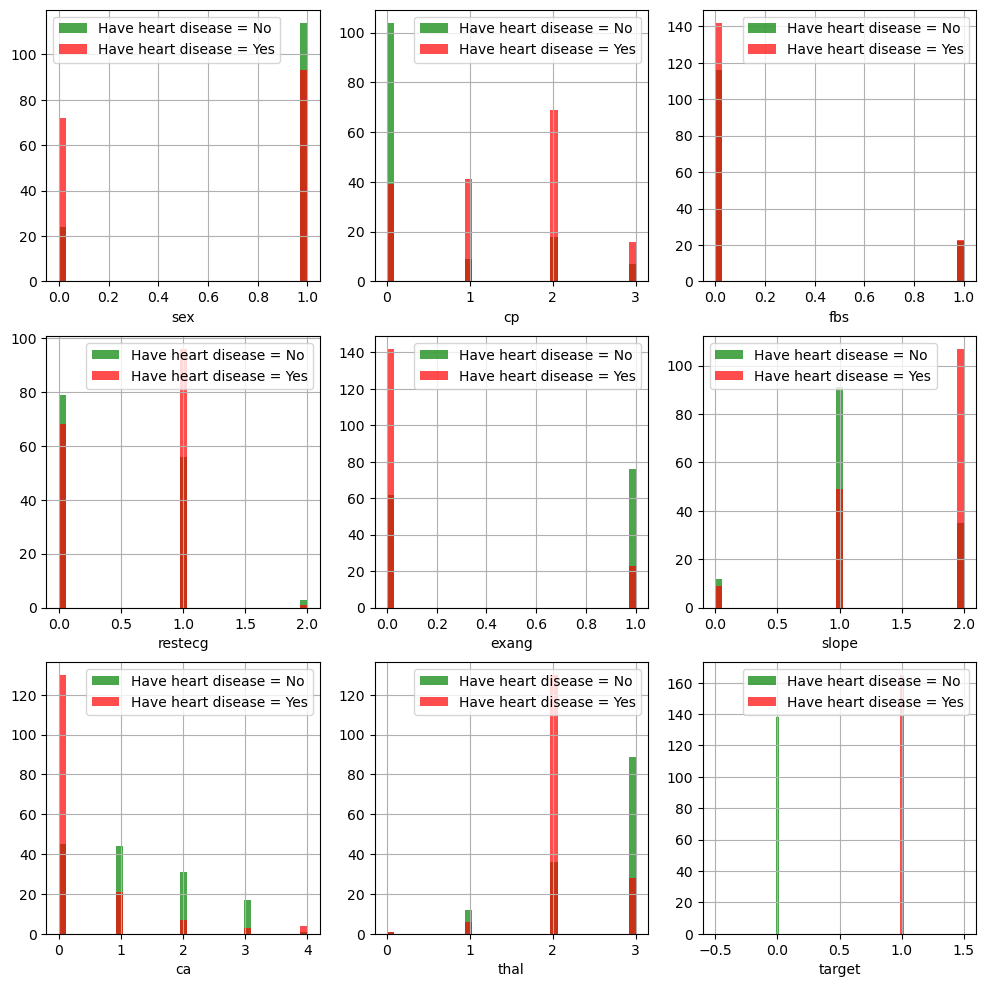

In [12]:
plt.figure(figsize=(12,12))

for i, column in enumerate(categorical, 1):
    plt.subplot(3,3,i)
    df[df['target']==0][column].hist(bins=35, color='green',label='Have heart disease = No',alpha=0.7)
    df[df['target']==1][column].hist(bins=35, color='red',label='Have heart disease = Yes',alpha=0.7)
    plt.legend()
    plt.xlabel(column)

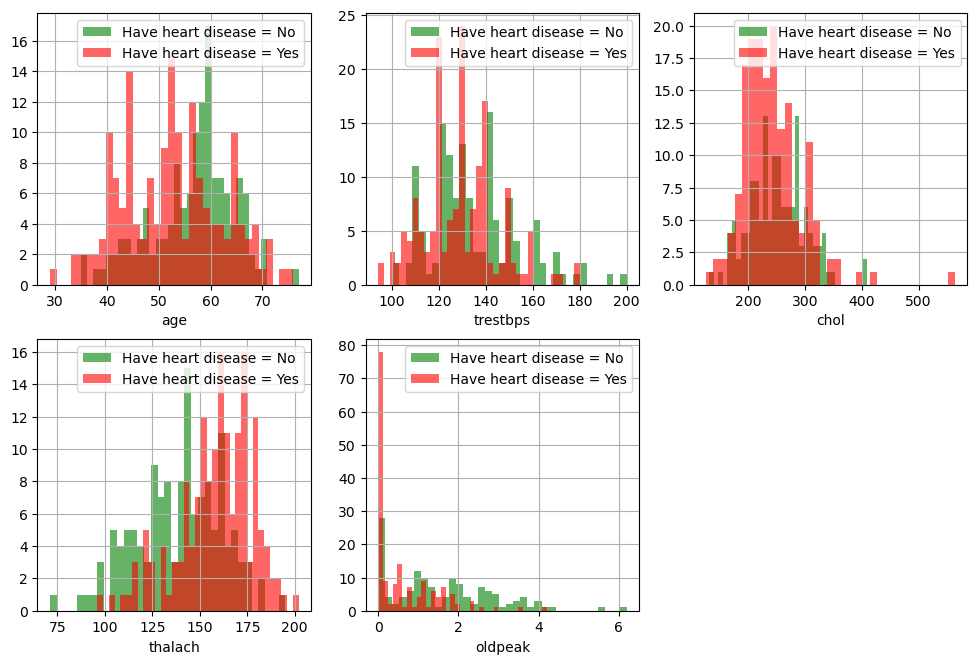

In [13]:
plt.figure(figsize=(12,12))

for i, column in enumerate(continuous, 1):
    plt.subplot(3,3,i)
    df[df['target']==0][column].hist(bins=35, color='green',label='Have heart disease = No',alpha=0.6)
    df[df['target']==1][column].hist(bins=35, color='red',label='Have heart disease = Yes',alpha=0.6)
    plt.legend()
    plt.xlabel(column)

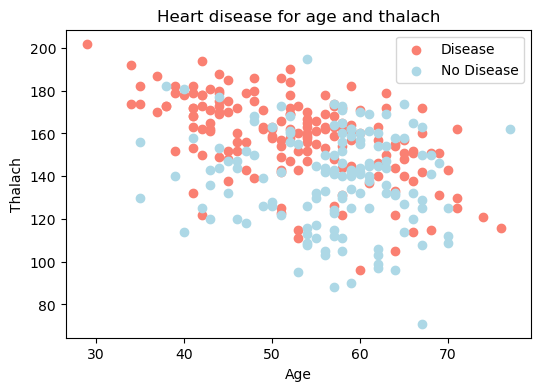

In [14]:
plt.figure(figsize=(6,4))

#scatter plot with heart disease positive example
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c='salmon')

#scatter plot with heart disease negative example
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c='lightblue')

plt.title('Heart disease for age and thalach')
plt.xlabel('Age')
plt.ylabel('Thalach')
plt.legend(['Disease','No Disease'])
plt.show()

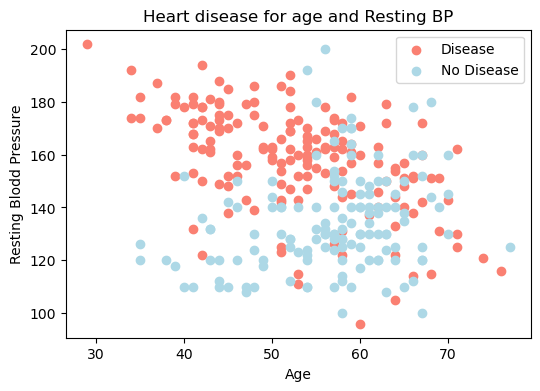

In [15]:
plt.figure(figsize=(6,4))

#scatter plot with heart disease positive example
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c='salmon')

#scatter plot with heart disease negative example
plt.scatter(df.age[df.target==0],
           df.trestbps[df.target==0],
           c='lightblue')

plt.title('Heart disease for age and Resting BP')
plt.xlabel('Age')
plt.ylabel('Resting Blodd Pressure')
plt.legend(['Disease','No Disease'])
plt.show()

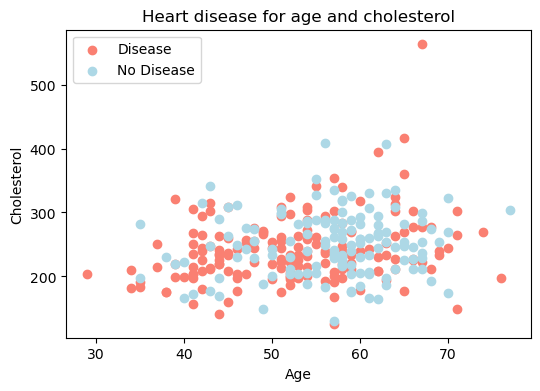

In [16]:
plt.figure(figsize=(6,4))

#scatter plot with heart disease positive example
plt.scatter(df.age[df.target==1],
           df.chol[df.target==1],
           c='salmon')

#scatter plot with heart disease negative example
plt.scatter(df.age[df.target==0],
           df.chol[df.target==0],
           c='lightblue')

plt.title('Heart disease for age and cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(['Disease','No Disease'])
plt.show()

### Scaling continous varibles

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scale = StandardScaler()
df[continuous] = scale.fit_transform(df[continuous])

In [19]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0,0,0.478391,-0.101730,0,1,-1.165281,1,-0.724323,1,0,3,0
299,-1.033002,1,3,-1.234996,0.342756,0,1,-0.771706,0,0.138373,1,0,3,0
300,1.503641,1,0,0.706843,-1.029353,1,1,-0.378132,0,2.036303,1,2,3,0
301,0.290464,1,0,-0.092738,-2.227533,0,1,-1.515125,1,0.138373,1,1,3,0


### Applying Machine Learning

In [20]:
#Spltting input and output
X = df.iloc[:,:-1]
y = df.iloc[:,-1] 

In [21]:
#SPlitting data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [22]:
#Applying Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [23]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
acc_score = accuracy_score(y_test, y_pred)*100

In [26]:
accuracies = []
accuracies.append(acc_score)

In [27]:
#Applying Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)*100
acc

73.77049180327869

In [28]:
accuracies.append(acc)

In [29]:
#applying KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_prd = model.predict(x_test)
acc_sc = accuracy_score(y_test, y_prd)*100
acc_sc

86.88524590163934

In [30]:
accuracies.append(acc_sc)

In [31]:
#Applying Support vector machine
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
y_prd = model.predict(x_test)
acc = accuracy_score(y_test, y_prd)*100
acc

86.88524590163934

In [32]:
accuracies.append(acc)

In [33]:
#Applying Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
y_prd = model.predict(x_test)
acc = accuracy_score(y_test, y_prd)*100
acc

83.60655737704919

In [34]:
accuracies.append(acc)

In [35]:
classifiers = ['Logistic regression','Decision Tree','KNN', 'SVM','Naive Bayes']

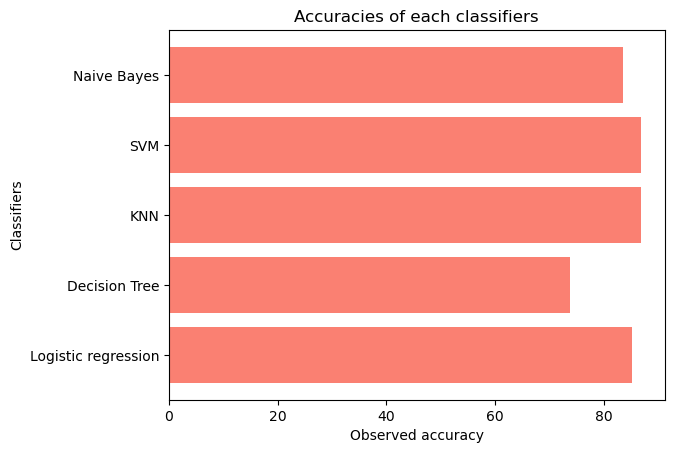

In [36]:
plt.barh(classifiers, accuracies, color = 'salmon')
plt.title('Accuracies of each classifiers')
plt.xlabel('Observed accuracy')
plt.ylabel('Classifiers')
plt.show()

The above bar graph shows that the highest accuracy is given by Naive Bayes and KNN, Decision tree and Log. Regression provide same accuracy.